In [1]:
import numpy as np
from matplotlib import pyplot as plt

import qcodes as qc
loc_provider = qc.data.location.FormatLocation(fmt='data/{date}/#{counter}_{name}_{time}')
qc.data.data_set.DataSet.location_provider=loc_provider
%matplotlib notebook

<IPython.core.display.Javascript object>

# 5 Tesla measurement

## DC measurements

<IPython.core.display.Javascript object>


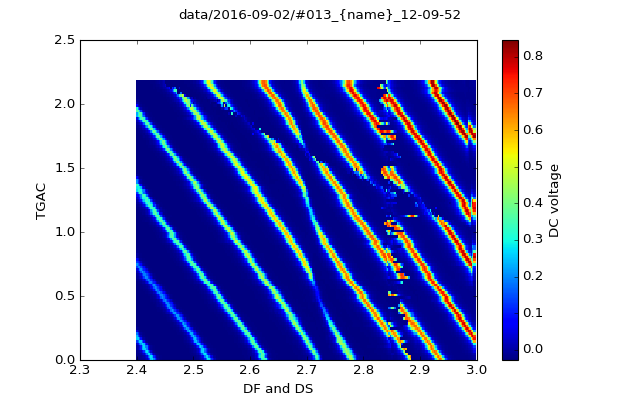

In [6]:
data = qc.load_data('data/2016-09-02/#013_{name}_12-09-52')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)

In [3]:
# Determining the coulomb peak trace
low = np.array([2.7607, 0.5018])
high = np.array([2.54653, 1.78387])
difference = high - low
ratio = difference / np.linalg.norm(difference)
print(ratio)

[-0.16476701  0.98633252]


The peaks seem to have shifted right after the measurements. Here is the updated version for a small region

<IPython.core.display.Javascript object>


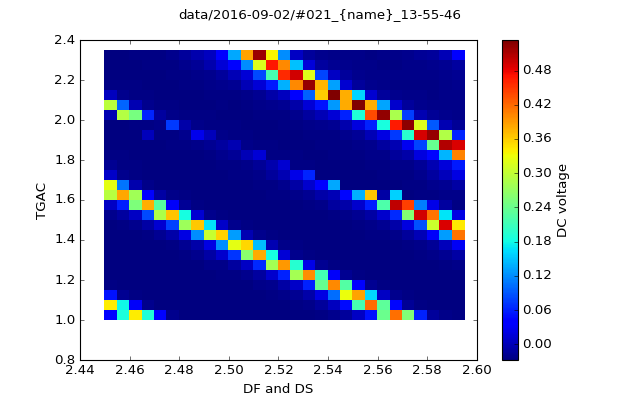

In [8]:
data = qc.load_data('data/2016-09-02/#021_{name}_13-55-46')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)

Below a zoom-in region is shown for the donor shift

<IPython.core.display.Javascript object>


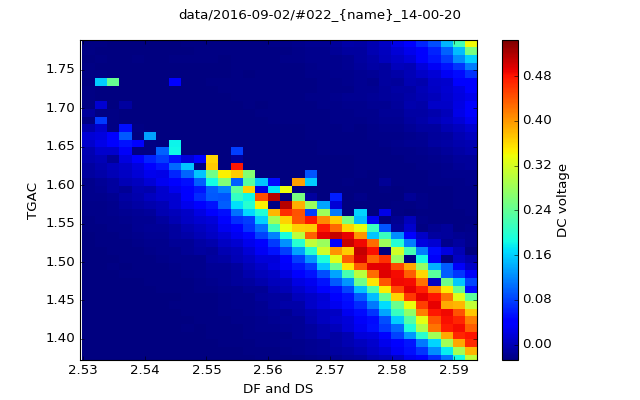

In [2]:
data = qc.load_data('data/2016-09-02/#022_{name}_14-00-20')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)

<IPython.core.display.Javascript object>


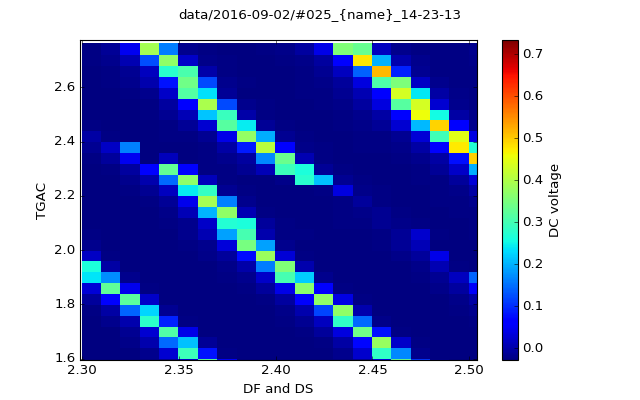

(0.8, 2.8)

In [13]:
data = qc.load_data('data/2016-09-02/#025_{name}_14-23-13')
plotQ = qc.MatPlot()
plotQ.add(data.DC_voltage)
plotQ.subplots[0].set_xlim(2.3,2.8)
plotQ.subplots[0].set_ylim(0.8,2.8)

## Tuning

<IPython.core.display.Javascript object>


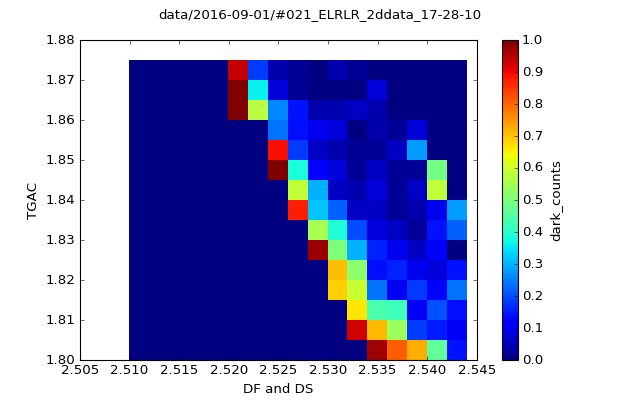

In [9]:
data = qc.load_data('data/2016-09-01/#021_ELRLR_2ddata_17-28-10')

plotQ = qc.MatPlot()
plotQ.add(data.dark_counts)

<IPython.core.display.Javascript object>


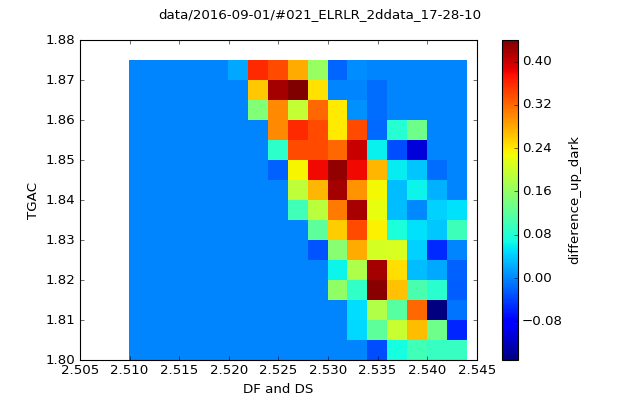

In [10]:
data = qc.load_data('data/2016-09-01/#021_ELRLR_2ddata_17-28-10')
plt.figure()
pl

# Variable read

<IPython.core.display.Javascript object>


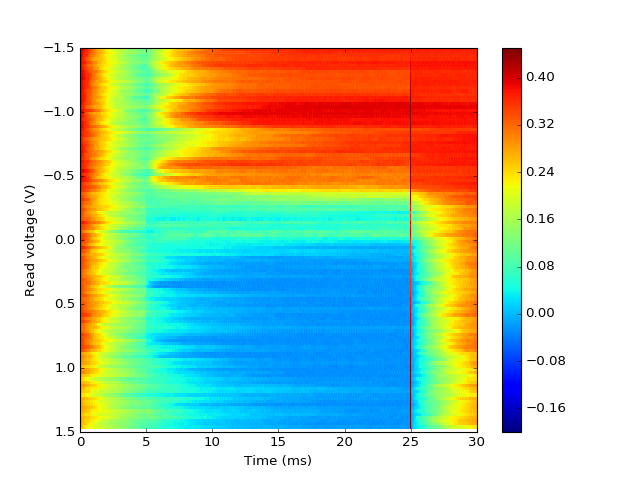

In [35]:
data = qc.load_data('data/2016-09-02/#030_variable_read_15-58-04')

fig = plt.figure()
plt.pcolormesh(data.index0[0]/1e3,
               data.variable_read_voltage_set,
               data.Channel_A_signal)
plt.ylim(plt.ylim()[::-1])
plt.colorbar()
plt.clim([-0.2,0.45])
plt.xlabel('Time (ms)')
plt.ylabel('Read voltage (V)')

<IPython.core.display.Javascript object>


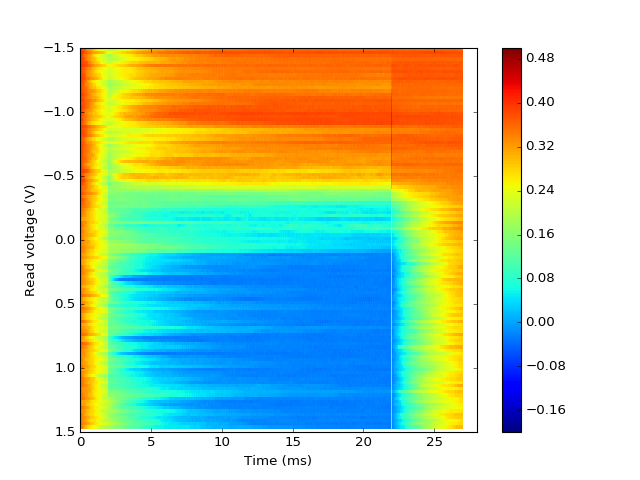

In [31]:
# data = qc.load_data('data/2016-09-02/#029_variable_read_15-29-43')

fig = plt.figure()
plt.pcolormesh(data.index0[0]/1e3,
               data.variable_read_voltage_set,
               data.Channel_A_signal,
               cmap=plt.get_cmap('jet'))
plt.xlim([0,28])
plt.ylim(plt.ylim()[::-1])
plt.colorbar()
plt.clim([-0.2,0.5])
plt.xlabel('Time (ms)')
plt.ylabel('Read voltage (V)')

# T1 measurement

Number of successful sweeps: 140


<IPython.core.display.Javascript object>


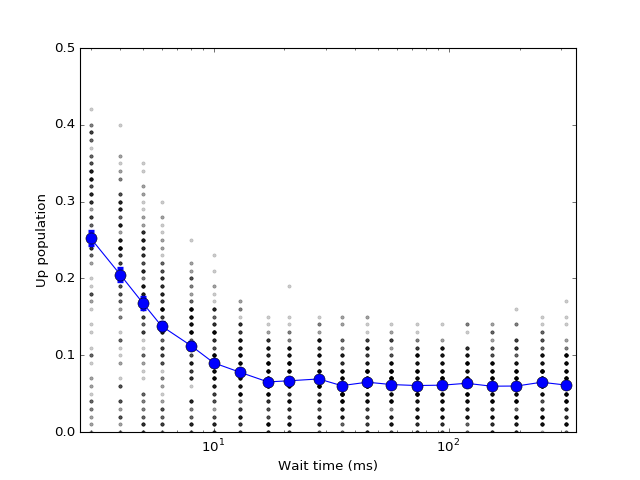

In [8]:
data = qc.load_data('data/2016-09-02/#001_T1_data_00-42-22')
T1_wait_times = data.T1_wait_time_set[0]
T1_wait_times_sorted = np.sort(T1_wait_times)
idx_sorted = np.argsort(T1_wait_times)

max_idx = np.argmin([~np.isnan(np.sum(datarow)) for datarow in data.up_proportion])
print('Number of successful sweeps: {}'.format(max_idx))
vals = data.up_proportion[:max_idx]
vals_sorted = vals[:,idx_sorted]
vals_mean_sorted = np.mean(vals_sorted,axis=0)
vals_std_sorted = np.std(vals_sorted,axis=0)


fig = plt.figure()
ax = fig.gca()
for datarow in vals_sorted:
    ax.plot(T1_wait_times_sorted, datarow, 'ok', ms=3, alpha=0.2)
(_, caps, _) = ax.errorbar(T1_wait_times_sorted, vals_mean_sorted, yerr=vals_std_sorted/np.sqrt(max_idx), marker='o', ms=10)
for cap in caps:
    cap.set_markeredgewidth(3)
ax.set_xscale("log")
ax.set_xlim([0.9*T1_wait_times_sorted[0], 1.1*T1_wait_times_sorted[-1]])
ax.set_ylim([0, 0.5])

ax.set_xlabel('Wait time (ms)')
ax.set_ylabel('Up population')